<a href="https://colab.research.google.com/github/JoanNjoki/Autolib-data-analysis/blob/main/Moringa_Data_Science_core_W4_Independent_Project_2021_05_Joan_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Data Analysis

### 1. Defining the question

In this task, my role is to investigate the claim that there is a significant difference between the mean of blue cars and utilibs taken on weekdays


My  null hypothesis:
 There is no significant difference in the mean for the blue cars and utilibs taken during weekdays

My alternative hypothesis: 
 There is a significant difference in the mean for the blue cars and utilibs taken during weekdays

###  Metric for Success

Trying to prove there is a difference in mean for utilib and blue cars



## 2. Reading the Data

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

In [2]:
#loading the dataset
autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
#loading the column description
columns_description = pd.read_excel('/content/columns_explanation.xlsx')
columns_description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
print('The number of records in the dataset',autolib.size)
print('The number of rows and columns in the dataset',autolib.shape)

The number of records in the dataset 209105
The number of rows and columns in the dataset (16085, 13)


In [5]:
#previewing the datatype of the dataset
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

The dataset has the right datatypes

In [6]:
#checking for null values
autolib.isnull().sum().sum()


0

No null values have been detected within the dataset

In [7]:
#checking for duplicates
autolib.duplicated().sum()

0

There are no duplicates

In [8]:
#lowering the column names
autolib.columns = autolib.columns.str.lower().str.replace(' ','_')
#confirming if the column names are in lower case
autolib.head(0)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum


The column names have been changed to lower case

In [9]:
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [10]:
#checking for unique values within the dataset
autolib.postal_code.value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [11]:
#unique values for day of week
autolib.dayofweek.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [12]:
#unique values for the day type
autolib.day_type.unique()

array(['weekday', 'weekend'], dtype=object)

# 6. Exploratory Analysis

##Univariate Analysis

In [13]:
#frequency distribution for categorical variables
autolib.dayofweek.value_counts().sort_values(ascending=False)

0    2374
1    2363
6    2274
4    2271
2    2268
3    2268
5    2267
Name: dayofweek, dtype: int64

Monday has the highest number of entries with 2374 followed by Tuesday 2363

In [14]:
#frequency distribution according to day type
autolib.day_type.value_counts()
#Weekday has 11544 entries with the weekend having 4541 entries

weekday    11544
weekend     4541
Name: day_type, dtype: int64

####Plotting bar graphs for each columns

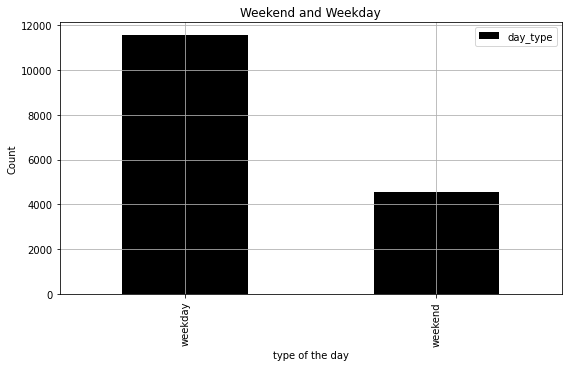

In [15]:
#plotting a bar graph for date
autolib['day_type'].value_counts().plot(kind='bar',color='black',figsize=(9,5))
plt.xlabel('type of the day')
plt.ylabel('Count')
plt.title('Weekend and Weekday')
plt.grid()
plt.legend(loc='upper right')

Acording to the bar graph, Weekday has the highest number of entries

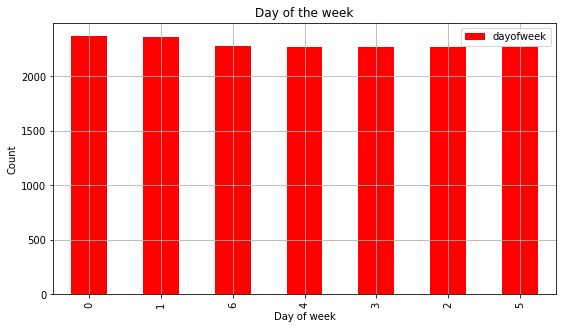

In [16]:
#plotting bar graphs for the days of the week
autolib['dayofweek'].value_counts().plot(kind='bar',color='red',figsize=(9,5))
plt.xlabel('Day of week')
plt.ylabel('Count')
plt.title('Day of the week')
plt.grid()
plt.legend(loc='upper right')

This bar graph confirms that the day O which is Monday has the highest number of counts

In [17]:
#descriptive statistics
autolib[['bluecars_taken_sum','utilib_taken_sum']].describe()

,bluecars_taken_sum,utilib_taken_sum
count,16085.000000,16085.000000
mean,125.926951,3.698290
std,185.426579,5.815058
min,0.000000,0.000000
25%,20.000000,0.000000
50%,46.000000,1.000000
75%,135.000000,4.000000
max,1352.000000,54.000000


<Figure size 864x1080 with 0 Axes>

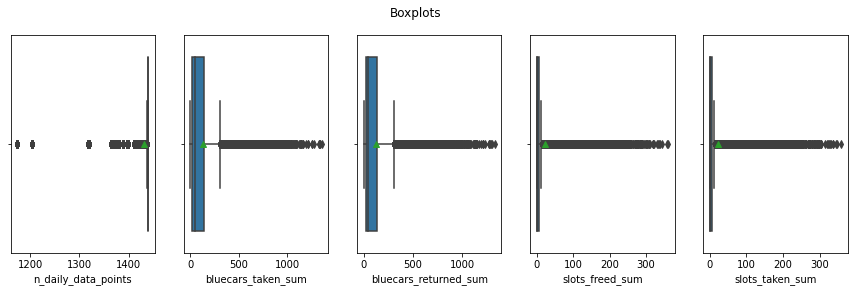

In [18]:
#plotting boxplots
fig = plt.figure(figsize= (12,15),edgecolor='lightgreen')
fig,(ax1,ax2,ax3,ax4,ax5) =plt.subplots(1,5, figsize=(15,4))
fig.suptitle('Boxplots')
sns.boxplot(data=autolib,x=autolib['n_daily_data_points'],ax=ax1,showmeans=True)
sns.boxplot(data=autolib,x=autolib['bluecars_taken_sum'],ax=ax2,showmeans=True)
sns.boxplot(data=autolib,x=autolib['bluecars_returned_sum'],ax=ax3,showmeans=True)
sns.boxplot(data=autolib,x=autolib['slots_freed_sum'],ax=ax4,showmeans=True)
sns.boxplot(data=autolib,x=autolib['slots_taken_sum'],ax=ax5,showmeans=True)



In [19]:
print(autolib['bluecars_taken_sum'].skew())
print(autolib['bluecars_taken_sum'].kurt())

2.4063548974959086
6.172692305510042


Text(0.5, 0, 'Utilibs')

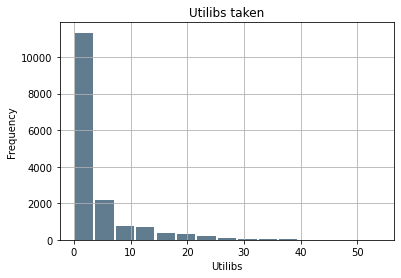

In [20]:
autolib['utilib_taken_sum'].plot.hist(grid=True, bins=15, rwidth=0.9,
                   color='#607c8e')
plt.title('Utilibs taken')
plt.xlabel('Utilibs')

Text(0.5, 0, 'blue cars')

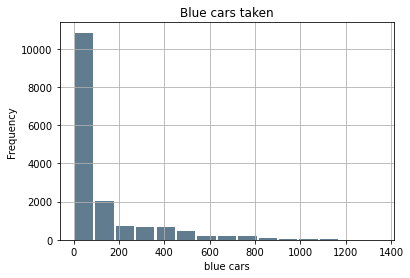

In [21]:
autolib['bluecars_taken_sum'].plot.hist(grid=True, bins=15, rwidth=0.9,
                   color='#607c8e')
plt.title('Blue cars taken')
plt.xlabel('blue cars')

Blue cars has skewness greater than 0,distribution has heavy tails>>leptokurtic
The positive skewness shows us that the blue cars column is positively skewed

There are outliers within the dataset however I will not drop them since the are essential in the analysis

In [22]:
#range
maximum = autolib['bluecars_taken_sum'].max()
minimum = autolib['bluecars_taken_sum'].min()
Range =maximum - minimum
Range

1352

The range for the blue cars taken is 1352

##Bivariate Analysis

###Numerical vs numerical variables

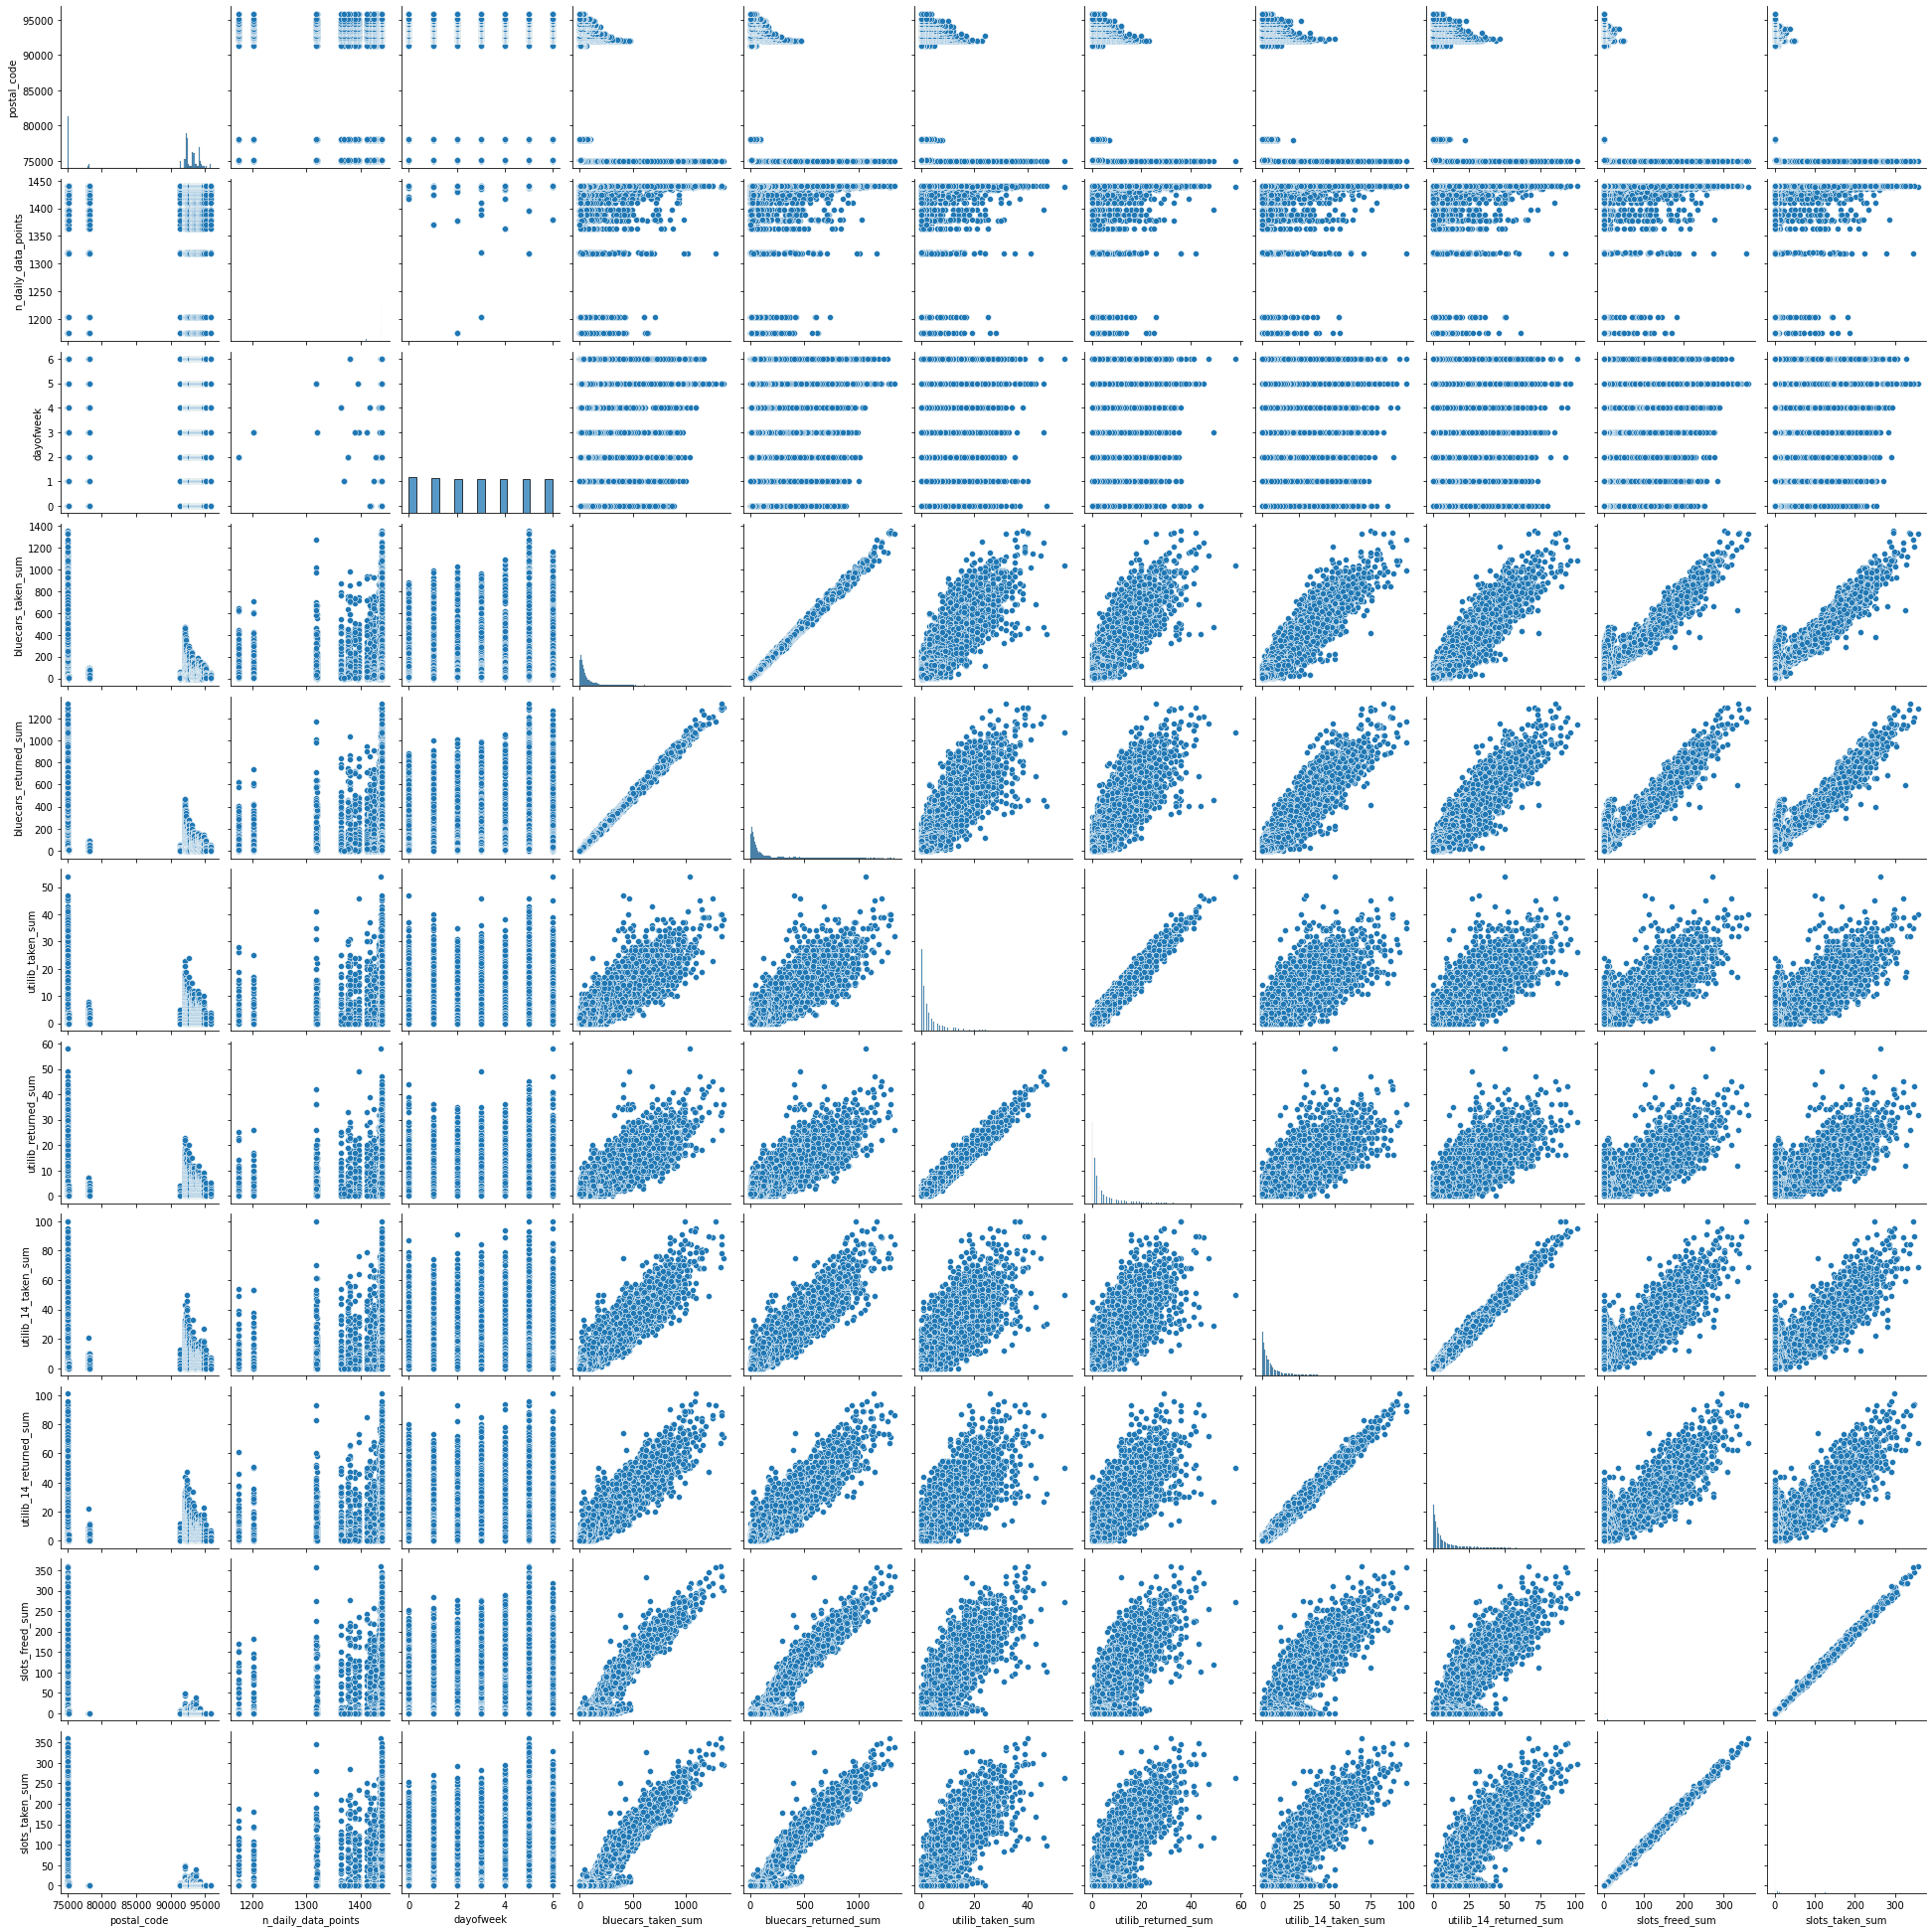

In [23]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib)
plt.show()

Text(0.5, 1.0, 'Coefficients for the numerical variables')

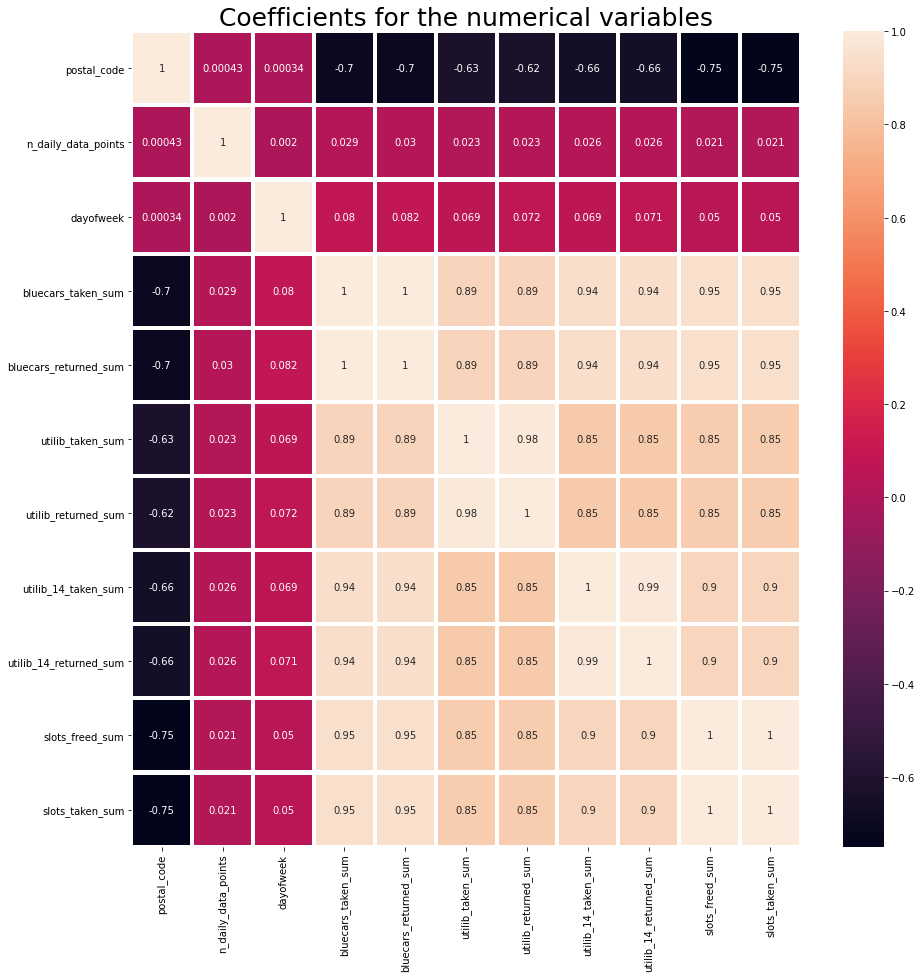

In [24]:
#plotting a heatmap showing correlation for numerics
atlb_corr = autolib.corr()

plt.figure(figsize=(15,15))
sns.heatmap(atlb_corr,xticklabels=atlb_corr.columns,yticklabels=atlb_corr.columns,annot=True,linewidths=3.1)
plt.title('Coefficients for the numerical variables',fontsize=25)

We have a positive correlation between bluecars, utilib and utilib 14 taken and freed with slots freed and taken.
We can also observe a negative correlation between postal code and blue cars,utilib, and utilib14 both freed and returned. The blue cars returned and blue cars taken look like they have the same values


##Hypothesis testing

H0: the mean of the blue cars taken on weekdays is the same as the mean of the utilib cars taken on weekdays.

HA: the mean of the blue cars taken on weekdays is different from the mean of the utilib cars taken on weekdays

Using systematic sampling to get our sample as the random variables chosen are selected evenly throughout the population

In [25]:
autolib_new = autolib[autolib.day_type=='weekday']
autolib_new2 = autolib_new[['bluecars_taken_sum','postal_code','utilib_taken_sum','day_type']]
autolib_new2

,bluecars_taken_sum,postal_code,utilib_taken_sum,day_type
0,110,75001,3,weekday
1,98,75001,1,weekday
2,138,75001,0,weekday
3,104,75001,2,weekday
4,114,75001,3,weekday
...,...,...,...,...
16078,12,95880,0,weekday
16079,15,95880,0,weekday
16080,15,95880,0,weekday
16083,11,95880,3,weekday


In [26]:
autolib_new2.shape

(11544, 4)

In [27]:
#defining a function that shows the sample size, random start value, and k intervals

def sys_sample(df,r,n):
  k = df.shape[0] // n
  index = [None]* n
  a = r
  index[0] = a

  for i in np.arange(1,n):
    a = a + k
    if a > df.shape[0]:
      a = a - df.shape[0]

    index[i] = a
  return(df.iloc[index])

sample = sys_sample(autolib_new2, r=5, n=25)
sample.head()



,bluecars_taken_sum,postal_code,utilib_taken_sum,day_type
7,84,75001,3,weekday
648,265,75005,12,weekday
1291,312,75009,7,weekday
1933,496,75013,28,weekday
2574,742,75017,34,weekday


###Normality Test using Shapiro Wilk Test





In [28]:
#normality test for blue cars taken
from scipy.stats import shapiro
stat, p = shapiro(sample['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting the results
alpha = 0.05
if p > alpha:
	print('The sample of blue cars taken  looks Gaussian')
else:
	print('The sample blue cars does not look Gaussian')
  

Statistics=0.648, p=0.000
The sample blue cars does not look Gaussian


In [29]:
#normality test for utilibs taken
from scipy.stats import shapiro
stat, p = shapiro(sample['utilib_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting the results
alpha = 0.05
if p > alpha:
	print('The sample of utilib taken  looks Gaussian')
else:
	print('The sample of utilibs taken does not look Gaussian')

Statistics=0.603, p=0.000
The sample of utilibs taken does not look Gaussian


Both utilib_taken and blue cars taken dont follow a normal distribution

###Z test

In [37]:
#defining a function z statitic and p value
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return z,pval

In [40]:
#getting the mean and standard deviations 
#inorder to get the zscore
a = autolib['bluecars_taken_sum'].mean()
b= autolib['utilib_taken_sum'].mean()
mudiff = a-b
x1 = sample['bluecars_taken_sum'].mean()
x2 = sample['bluecars_taken_sum'].mean()
sd1 = sample['bluecars_taken_sum'].std()
sd2= sample['bluecars_taken_sum'].std()
n1 = len(sample['bluecars_taken_sum'])
n2 = len(sample['utilib_taken_sum'])

twoSampZ(x1, x2, mudiff, sd1, sd2, n1, n2)

(-2.491377311411891, 0.012724890642128228)

In [60]:
from scipy.stats import norm
import scipy.stats as stats
p = stats.norm.cdf(-2.491377311411891)

print('Pvalue:',n)
#interpretation
if n < 0.025:
  print('Reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

Pvalue: 4.048071046353e-05
Reject the null hypothesis


Reject the null hypothesis. The pvalue is less than alpha(0.05)

###Point Estimation

Point estimation for blue cars

In [31]:
#populaton mean for blue cars
blue_popmean = autolib['bluecars_taken_sum'].mean()
#sample mean for blue cars
blue_smean = sample['bluecars_taken_sum'].mean()
#point estimator
blue_popmean - blue_smean

7.646950575069937

The bluecars sample mean is approximately 10 points away from the population

In [32]:
#populaton mean for utilib cars
ut_popmean = autolib['utilib_taken_sum'].mean()
#sample mean for utilib cars
ut_smean = sample['utilib_taken_sum'].mean()
#point estimator
ut_popmean - ut_smean

-1.18170966739198

The utilib sample mean is 0.27 points away from the population mean

###Confidence interval

In [33]:
#confidence interval for bluecars
from math import sqrt
#sample size
sample_size = len(sample['bluecars_taken_sum'])

#standard error
se = (sample['bluecars_taken_sum'].std())/(sqrt(sample_size))
#calculating confidence interval
from scipy.stats import norm
print(norm.interval(0.95,loc=blue_smean,scale=se))
print(autolib['bluecars_taken_sum'].mean())


(50.286618628486224, 186.27338137151378)
125.92695057506994


We are 95 % that the population mean for blue cars is between 105.95 and 125.55

In [34]:
#confidence interval for bluecars
#sample size
sample_size = len(sample['utilib_taken_sum'])

#standard error
se = (sample['utilib_taken_sum'].std())/(sqrt(sample_size))
#calculating confidence interval
from scipy.stats import norm
print(norm.interval(0.95,loc=ut_smean,scale=se))
print(autolib['utilib_taken_sum'].mean())

(1.5512909675956759, 8.208709032404323)
3.69829033260802


The confidence interval for population mean for utilibs is 3.125 and 3.716

###Conclusion

Reject the null hypothesis, p-value(4.048071046353e-05) is less than 0.05. 

---

Therefore conclude there is a significant difference between the mean of utilib cars to blue cars taken on weekdays

###Challenging the solution

In [57]:
#challenging the solution by using a smaller sample size of 100 and 
#random start at 70
sample2 = sys_sample(autolib_new2, r=70, n=25)

In [59]:
#performing a ttest
ttest,pval = ttest_ind(sample2['bluecars_taken_sum'],sample2['utilib_taken_sum'])

print("P_value:", pval)
print("ttest:", ttest)
# Interpretation 
if pval < 0.025:
  print("We reject the Null Hypothesis")
else:
  print("We accept the Null Hypothesis")

P_value: 0.0010553018896002032
ttest: 3.4870103925904683
We reject the Null Hypothesis


The conclusion still holds to reject the null hypothesis.